In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [2]:
data = pd.read_csv("Dataset/digikala.csv")
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36272 entries, 0 to 36271
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Order               36272 non-null  int64  
 1   ID_Customer            36272 non-null  int64  
 2   ID_Item                36272 non-null  int64  
 3   DateTime_CartFinalize  36272 non-null  object 
 4   Amount_Gross_Order     36271 non-null  float64
 5   city_name_fa           36271 non-null  object 
 6   Quantity_item          36271 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ MB


In [4]:
data["DateTime_CartFinalize"] = pd.to_datetime(data["DateTime_CartFinalize"])
data.set_index(data["DateTime_CartFinalize"],inplace=True)

<AxesSubplot:xlabel='DateTime_CartFinalize'>

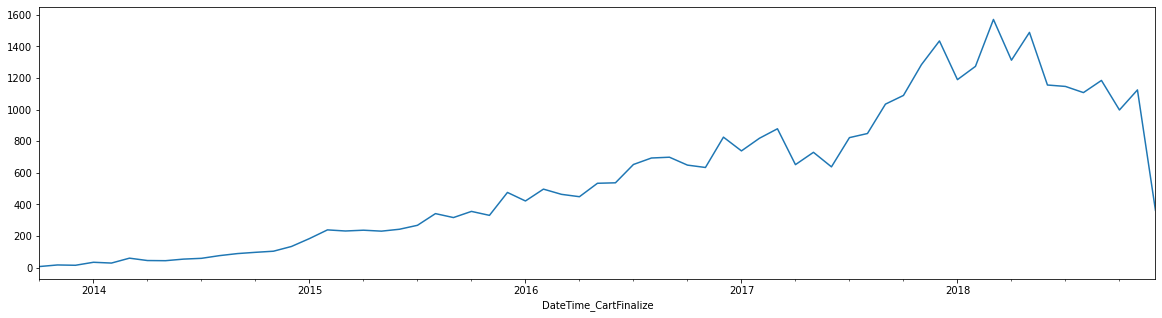

In [5]:
data.Quantity_item.resample("M").count().plot(figsize=(20,5))

In [6]:
city = data.groupby(["city_name_fa"])["ID_Customer"].nunique().reset_index()
city.head()

,city_name_fa,ID_Customer
0,آب بر,2
1,آبادان,78
2,آباده,15
3,آبدانان,7
4,آبش احمد,2


In [7]:
city.sort_values("ID_Customer",ascending=False,inplace=True)
city.reset_index(inplace=True,drop=True)
city.head()

,city_name_fa,ID_Customer
0,تهران,18238
1,کرج,1056
2,اصفهان,1027
3,مشهد,992
4,اهواز,705


In [8]:
count = city[city["ID_Customer"]<city["ID_Customer"][5]]["ID_Customer"].sum()
city[city["ID_Customer"]<city["ID_Customer"][5]] = ["other",count]
city.drop_duplicates(subset ="city_name_fa",inplace = True)
city

,city_name_fa,ID_Customer
0,تهران,18238
1,کرج,1056
2,اصفهان,1027
3,مشهد,992
4,اهواز,705
5,شیراز,690
6,other,11191


([<matplotlib.patches.Wedge at 0x1d8e526b5e0>,
 [Text(-0.13104098714481732, 1.0921667728365076, 'ﻥﺍﺮﻬﺗ'),
  Text(-1.0382392584667093, -0.36339956271093343, 'ﺝﺮﮐ'),
  Text(-0.9492375557772008, -0.5558309659438972, 'ﻥﺎﻬﻔﺻﺍ'),
  Text(-0.829273044468001, -0.7227075603027638, 'ﺪﻬﺸﻣ'),
  Text(-0.705846676462597, -0.8436708299607768, 'ﺯﺍﻮﻫﺍ'),
  Text(-0.5911885542531408, -0.9276292865795481, 'ﺯﺍﺮﯿﺷ'),
  Text(0.559565431016052, -0.94704093280693, 'other')],
 [Text(-0.07147690207899127, 0.595727330638095, '53.80'),
  Text(-0.5663123228000232, -0.19821794329687278, '3.12'),
  Text(-0.5177659395148367, -0.30318052687848934, '3.03'),
  Text(-0.4523307515280005, -0.3942041238015075, '2.93'),
  Text(-0.38500727807050744, -0.4601840890695146, '2.08'),
  Text(-0.3224664841380767, -0.5059796108615716, '2.04'),
  Text(0.3052175078269374, -0.5165677815310526, '33.01')])

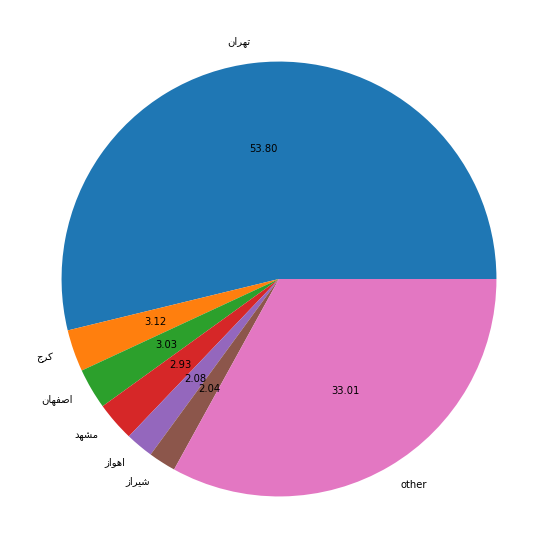

In [9]:
city["city_name_fa"] = city['city_name_fa'].to_numpy(dtype='str')
labels = [get_display(reshape(city["city_name_fa"][i])) for i in range(7)]
plt.figure(figsize=(10,10))
plt.pie(city["ID_Customer"],labels=labels,autopct='%.2f')